<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/01_4_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_SVM(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Support Vector Machine(SVM)

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.

In [ ]:
# 실행 후 런타임을 재실행해주세요
!pip install joblib==1.1.0
!pip install mglearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LinearSVM  기본

In [ ]:
# 랜덤한 데이터 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)


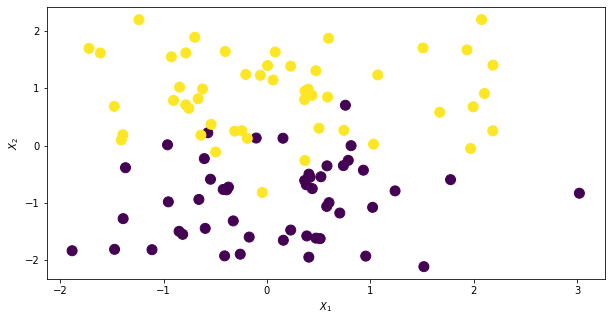

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c=y, marker = 'o', s=100)
plt.xlabel('$X_1$')
plt.ylabel("$X_2$")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
from sklearn.svm import SVC # 분류
from sklearn.svm import SVR # 회귀



linear_svc = SVC(kernel = 'linear', C=1)
linear_svc.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [ ]:
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

# step 1. 임포트 모델
from sklearn.svm import SVC

# 모델 선언 및 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)



SVC의 매개변수
- kernel: 커널설정, 기본값은 'rbf' -> 우리는 linear로 하겠습니다. 

- C : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0
    C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다.    
    즉, **모델의 오차 허용률**을 조절한다.  
    C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.
    C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
    즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다. 

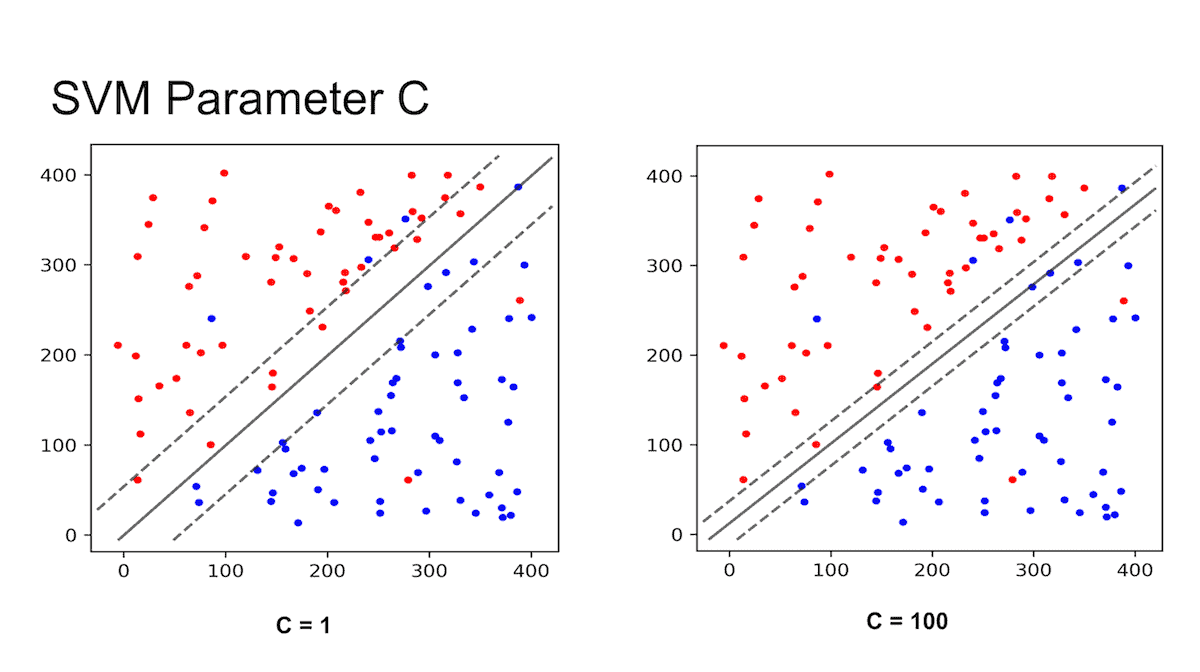

In [ ]:
# 각 클래스의 서포트 벡터(Support vector)의 개수
linear_svc.n_support_

array([11, 11], dtype=int32)

In [ ]:
# 각 클래스의 서포트 x값(X+, X-)
linear_svc.support_vectors_

array([[ 0.93214796, -0.43016092],
       [ 0.78592756, -0.25795973],
       [ 0.4052906 , -0.49940382],
       [ 0.75819357,  0.70437177],
       [-0.37263315, -0.72557455],
       [-0.57203115,  0.2233155 ],
       [-1.36815913, -0.38668091],
       [ 0.58012378, -0.35417959],
       [-0.60589163, -0.22767387],
       [ 0.15463855,  0.12778948],
       [-0.10437829,  0.13139132],
       [-1.39366737,  0.18778455],
       [ 2.18328304,  0.25667343],
       [-0.49668004, -0.11219676],
       [-0.31200233,  0.25211384],
       [-0.19036585,  0.12604824],
       [-0.24324387,  0.25824598],
       [ 0.36668562, -0.26070754],
       [-0.6389601 ,  0.18217273],
       [-1.40853733,  0.09722171],
       [ 1.96902533, -0.05099111],
       [ 1.02999534,  0.02436759]])

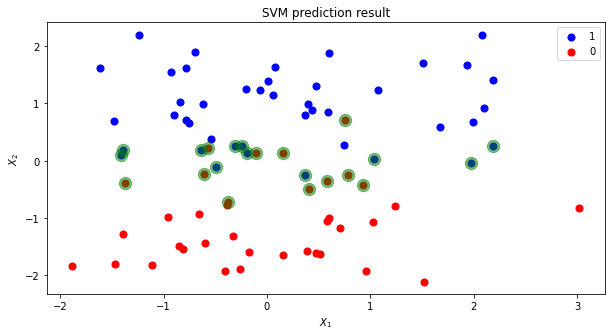

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1], 
            s = 150, c = 'g', alpha = 0.5) #알파는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM prediction result")

plt.show()

In [ ]:
print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
print('test_score: {}'.format(linear_svc.score(X_test, y_test)))

train_score: 0.925
test_score: 0.85


C :  0.01
train_score: 0.9375
test_score: 0.85


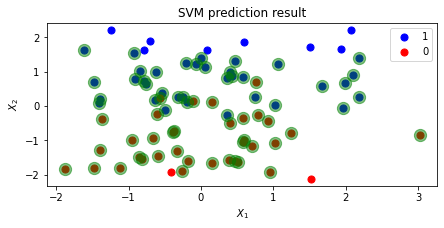

C :  0.1
train_score: 0.9375
test_score: 0.85


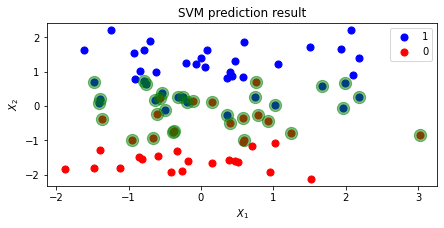

C :  1
train_score: 0.925
test_score: 0.85


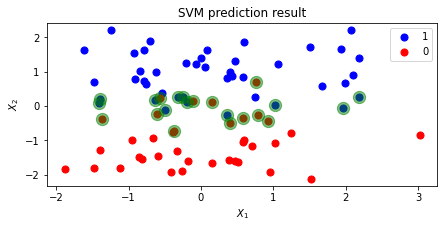

C :  10
train_score: 0.9375
test_score: 0.85


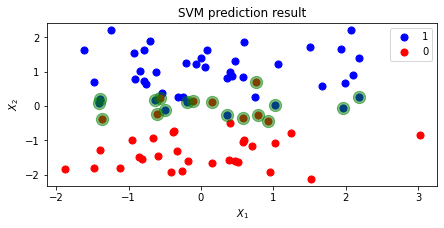

In [ ]:
#값이 너무 극단적이기 때문에 C값을 조금 줄여서(규제를 줘서) 할 필요가 있음

C_list = [0.01, 0.1, 1, 10]

for c in C_list : 
    print("C : ", c)
    
    linear_svc = SVC(kernel = 'linear', C = c).fit(X_train, y_train)

    print('train_score: {}'.format(linear_svc.score(X_train, y_train)))
    print('test_score: {}'.format(linear_svc.score(X_test, y_test)))
    plt.figure(figsize = (7,3))
    plt.scatter(X_train[y_train==1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s = 50)
    plt.scatter(X_train[y_train==0, 0], X_train[y_train ==0, 1],  c= 'r', label = '0', s = 50)
    plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1], 
                s = 150, c = 'g', alpha = 0.5) #알파는 투명도


    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend()
    plt.title("SVM prediction result")

    plt.show()

### 실제 데이터에 적용하기

In [ ]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

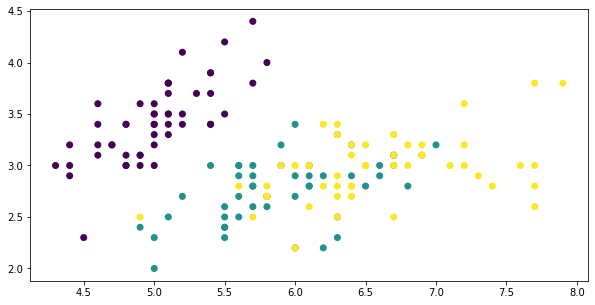

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = iris_data.target,
                                                     shuffle = True)

In [ ]:
import numpy as np
np.arange(1, 11).mean()
np.arange(1, 11).std()

2.8722813232690143

In [ ]:
# 스케일링 하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 선형 SVC 모델 객체 불러오고 학습시키기

from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# train score
model.score(X_train, y_train)

0.9821428571428571

In [ ]:
# test score 
model.score(X_test, y_test)

0.9473684210526315

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import GridSearchCV

# 모델 객체 : estimator 
svc = SVC(kernel = 'linear') 

# 테스트할 파라미터의 딕셔너리 
dic_params = {'C' : [0.001, 0.1, 1, 10, 1000]}

# gridsearch 
grid_cls = GridSearchCV(svc, param_grid = dic_params, cv = 3, refit=False, scoring = ['f1_macro', 'accuracy'])
grid_cls

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.1, 1, 10, 1000]}, refit=False,
             scoring=['f1_macro', 'accuracy'])

In [ ]:
grid_cls.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.1, 1, 10, 1000]}, refit=False,
             scoring=['f1_macro', 'accuracy'])

In [ ]:
grid_cls.cv_results_

{'mean_fit_time': array([0.00119368, 0.00082453, 0.00065136, 0.00077089, 0.00093325]),
 'std_fit_time': array([1.63171271e-04, 6.72268056e-05, 1.31397409e-04, 7.96192728e-05,
        1.58700396e-04]),
 'mean_score_time': array([0.001839  , 0.00136836, 0.00113066, 0.00122547, 0.00131329]),
 'std_score_time': array([5.17148981e-04, 2.99923455e-05, 1.43567496e-04, 4.80096328e-05,
        3.48484638e-05]),
 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 1000}],
 'split0_test_f1_macro': array([0.54192654, 0.94871795, 0.9484127 , 0.9484127 , 0.9484127 ]),
 'split1_test_f1_macro': array([0.16326531, 0.97217391, 0.97217391, 0.94405594, 0.94405594]),
 'split2_test_f1_macro': array([0.86316366, 0.9465812 , 0.97316157, 0.97316157, 0.97316157]),
 'mean_test_f1_macro': array([0.52278517, 0.95582435, 0.96458273, 0.955210

#### 시각화
Decision Boundary 시각화를 위해 2가지 변수만 사용해보겠습니다. 

In [ ]:
# 시각화를 위해 2개의 특성만 사용(sepal width, pedal length)
from sklearn.svm import SVC

data_x = iris_data.data[:, [1,3]]
data_y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, 
                                                    shuffle = True)
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print("train score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print('test score: {:.3f}'.format(linear_svm.score(X_test, y_test)))

train score: 0.958
test score: 0.967


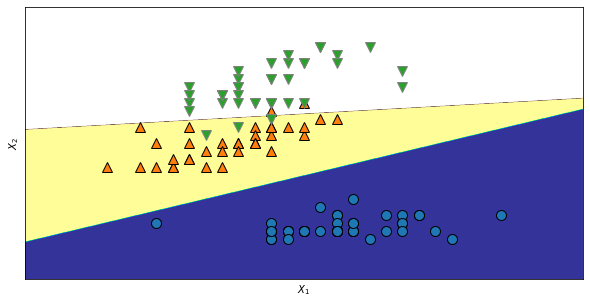

In [ ]:
#시각화를 위해 mglearn 모듈 사용
import mglearn

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

#2차원으로만 그림을 그린거라서 그림의 정확도가 그렇게 좋진 않음. 
#실제 모델은 정확도가 더 좋음. 
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

#### C값 변경

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정(gamma는 
커널의 폭을 제어하는 매개변수, 기본값은 'scale'(= 1/(n_features*X.var())) 
        즉, 결정경계의 굴곡의 정도를 결정한다. 
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

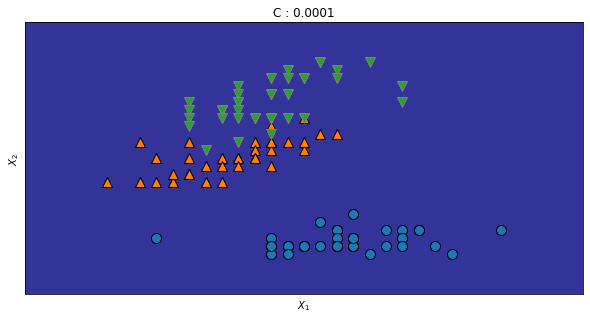

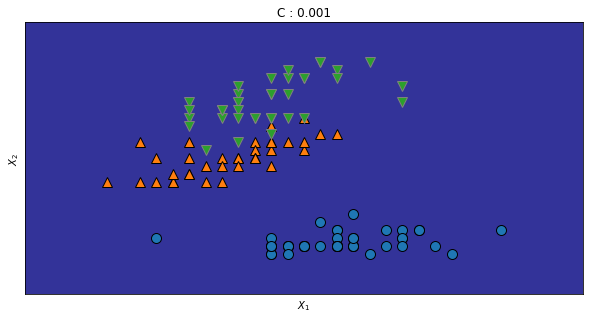

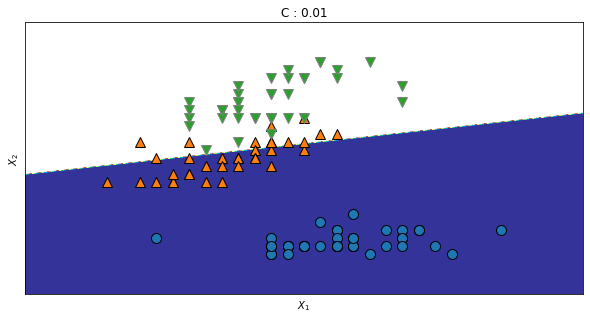

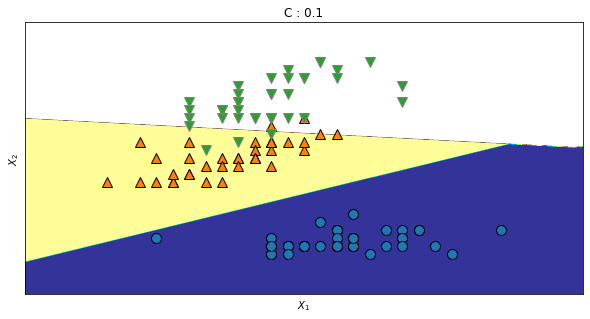

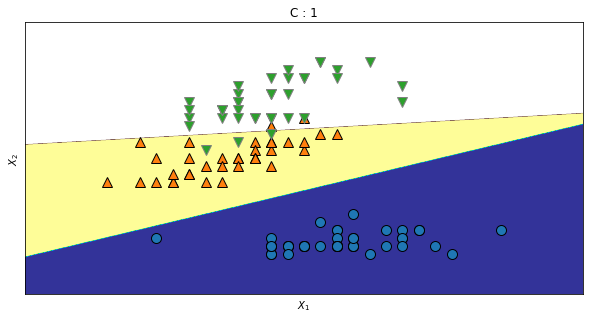

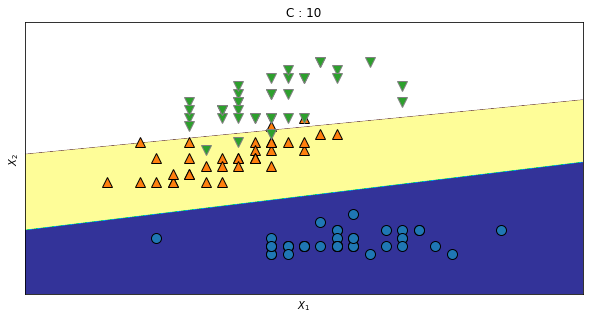

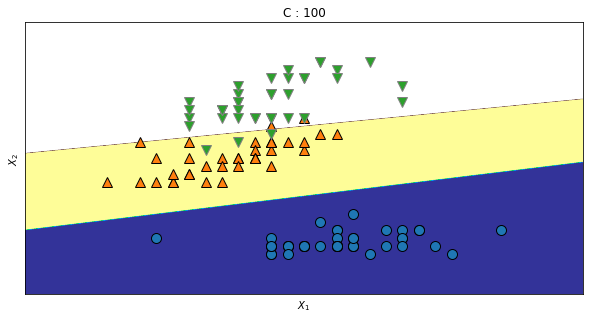

In [ ]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값이 커질 수록 마진이 작아진다. 
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.

train_score = []
test_score = []

for C in C_list:
    linear_svm = SVC(kernel ='linear', C = C).fit(X_train, y_train)
    score_tr = linear_svm.score(X_train, y_train)
    score_te = linear_svm.score(X_test, y_test)
    train_score.append(score_tr)
    test_score.append(score_te)

    plt.figure(figsize=(10,5))
    mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

    plt.title(f"C : {C}")
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()

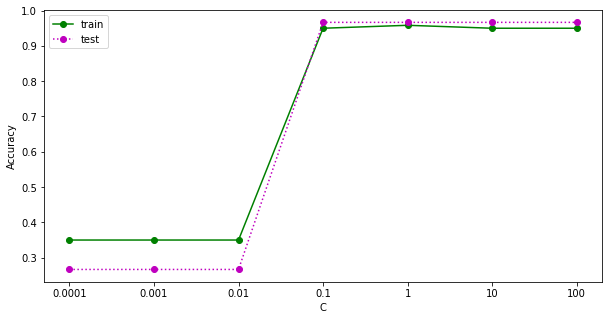

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C_list)),C_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()
#hyper parameter tuning 방법에 따라 최적을 찾아주면 됨. 

### SVM.LinearSVC() 구현

In [ ]:
from sklearn.svm import LinearSVC
linear_svc2 = LinearSVC(C = 1, loss ='hinge').fit(X_train, y_train)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

data_iris = load_iris()
X = data_iris.data[:, [1,3]]
y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target,
                                                     shuffle = True)

In [ ]:
print('train score : {:.3f}'.format(linear_svc2.score(X_train, y_train)))
print('test score : {:.3f}'.format(linear_svc2.score(X_test, y_test)))

train score : 0.884
test score : 0.868


LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.  
  - penalty 매개변수로 규제를 선택할 수 있으며, loss 매개변수로는 loss함수를 선택할 수 있다.  
  - pnealty의 기본값은 'l2'  
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.  
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

Hinge Loss

- 로지스틱 회귀는 WX의 값에 따라 0-1사이의 확률값으로 예측하지만, SVM은 0 아니면 1로 예측한다

- Logistic Regression의 Cost는 Z(Decision Boundary)가 아무리 커져도 0이 되지 않는다. 반면, SVM의 Cost는 Z가 1 or -1인 순간 0이 된다.

- 이를 Hinge Loss라고 하는데, 비확률적 분류 모델인 SVM의 Cost로 적합하다.

LinearSVC()의 주요 매개변수  
- 회귀 모델은 alpha
- LinearSVC와 LogisticRegression은 C 이다.
- alpha가 클수록, C가 작을수록 모델은 단순해진다.(규제가 커진다 -> Overfitting이 해소된다)

### 참고 : kernel 변경

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
from sklearn.model_selection import train_test_split
X, y = make_circles(factor=0.5, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

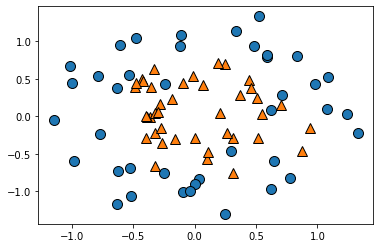

In [ ]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
from sklearn.svm import SVC 

SVC(kernel = 'rbf', C = 1, gamma = 1)

SVC(C=1, gamma=1)

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=1, gamma=1)
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

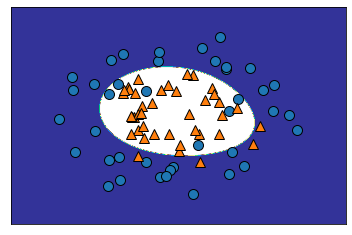

In [ ]:
mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]

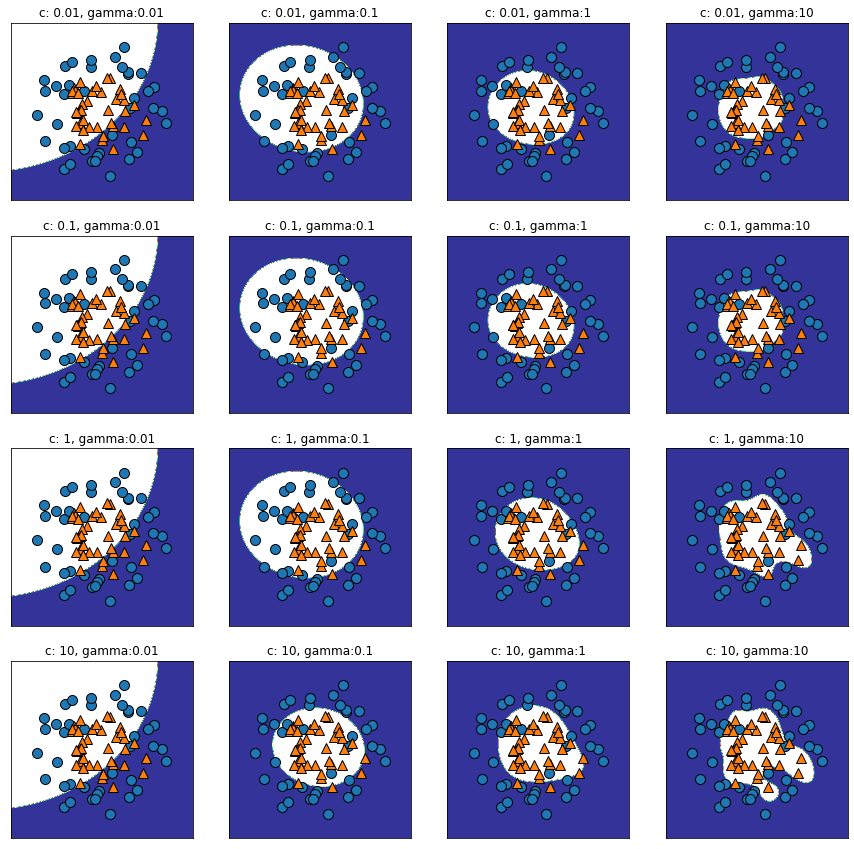

In [ ]:
model_list = {}
count = 1
plt.figure(figsize=(15, 15))
for idx, c in enumerate(C_list):
    for idx2, gamma in enumerate(gamma_list):
        idx = idx+1
        idx2 = idx2 +1

        plt.subplot(4,4, count)
        count +=1

        svc_clf = SVC(kernel='rbf', C=c, gamma=gamma)
        model_key = (c, gamma)
        svc_clf.fit(X_train, y_train)

        model_list[model_key] = svc_clf
        plt.gca().set_title('c: {}, gamma:{}'.format(c, gamma))
        mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


## 직접 학습시켜봅시다. 


In [ ]:
from sklearn.datasets import load_wine
data_wine = load_wine()
data_wine

In [ ]:
data_wine.feature_names, len(data_wine.feature_names)

In [ ]:
data_wine.target

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
y_wine = pd.DataFrame(data_wine.target, columns=['target'])

df_wine = pd.concat([x_wine, y_wine], axis=1)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
from sklearn.model_selection import train_test_split
    
# 7:3의 비율로 train, test데이터 분리 (stratify=y_wine : class의 비율을 유지한채로)
X_train, X_test, y_train, y_test = train_test_split(data_wine.data, data_wine.target, test_size=0.3, stratify=y_wine, random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
# 성능평가
from sklearn.model_selection import GridSearchCV

# 모델 객체 : estimator 
svc = SVC() 

# 테스트할 파라미터의 딕셔너리 
dic_params = {'C' : [0.001, 0.1, 1, 10], 
              'gamma' : [0.01, 1, 10, 'scale'],
              'kernel':['linear', 'rbf', 'poly']}

# gridsearch 
grid_cls = GridSearchCV(svc, param_grid = dic_params, cv = 2, refit=False, scoring = ['f1_macro', 'accuracy'])
grid_cls

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'gamma': [0.01, 1, 10, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit=False, scoring=['f1_macro', 'accuracy'])

In [ ]:
grid_cls.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'gamma': [0.01, 1, 10, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit=False, scoring=['f1_macro', 'accuracy'])

In [ ]:
grid_cls.cv_results_

In [ ]:
dic = {'a' :[1, 2, 3], 'b':[4, 5, 6]}
pd.DataFrame(dic)

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
pd.DataFrame(grid_cls.cv_results_)[['params']]

In [ ]:
df = pd.DataFrame(grid_cls.cv_results_)[['params', 'mean_test_f1_macro', 'mean_test_accuracy']]
df

,params,mean_test_f1_macro,mean_test_accuracy
0,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.619538,0.693548
1,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.191571,0.403226
2,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.886369,0.887097
3,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.619538,0.693548
4,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.191571,0.403226
5,"{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
6,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}",0.619538,0.693548
7,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.191571,0.403226
8,"{'C': 0.001, 'gamma': 10, 'kernel': 'poly'}",0.886369,0.887097
9,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'line...",0.619538,0.693548


In [ ]:
df.sort_values('mean_test_f1_macro', ascending = False)

,params,mean_test_f1_macro,mean_test_accuracy
12,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.893021,0.895161
21,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.893021,0.895161
15,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.893021,0.895161
18,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",0.893021,0.895161
5,"{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
44,"{'C': 10, 'gamma': 10, 'kernel': 'poly'}",0.886369,0.887097
29,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
17,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
41,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
20,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",0.886369,0.887097


In [ ]:
df.sort_values('mean_test_accuracy', ascending = False)

,params,mean_test_f1_macro,mean_test_accuracy
12,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.893021,0.895161
21,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.893021,0.895161
18,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",0.893021,0.895161
15,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.893021,0.895161
36,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.884814,0.887097
29,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097
30,"{'C': 1, 'gamma': 10, 'kernel': 'linear'}",0.884814,0.887097
20,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",0.886369,0.887097
32,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}",0.886369,0.887097
17,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.886369,0.887097


In [ ]:
from scipy.stats import uniform
uniform(loc=0, scale=4)

In [ ]:
# 성능평가
from sklearn.model_selection import RandomizedSearchCV

# 모델 객체 : estimator 
svc = SVC() 

# 테스트할 파라미터의 딕셔너리 
dic_params = {'C' : uniform(loc=0, scale=4), 
              'gamma' : [0.01, 1, 10, 'scale'],
              'kernel':['linear', 'rbf', 'poly']}

# RandomizedSearchCV 
random_cls = RandomizedSearchCV(svc, param_distributions = dic_params, cv = 2, 
                              refit=False,  n_iter=10,scoring = ['f1_macro', 'accuracy'])
random_cls

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f782708dee0>,
                                        'gamma': [0.01, 1, 10, 'scale'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   refit=False, scoring=['f1_macro', 'accuracy'])

In [ ]:
random_cls.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f782708dee0>,
                                        'gamma': [0.01, 1, 10, 'scale'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   refit=False, scoring=['f1_macro', 'accuracy'])

In [ ]:
random_cls.cv_results_

{'mean_fit_time': array([0.00167692, 0.02918935, 0.02635217, 0.02774394, 0.03100729,
        0.00084245, 0.02730536, 0.00087607, 0.000826  , 0.00050092]),
 'std_fit_time': array([4.36902046e-04, 2.54318714e-02, 2.38342285e-02, 2.52255201e-02,
        2.84841061e-02, 1.54972076e-06, 2.49640942e-02, 1.84774399e-05,
        5.84125519e-06, 2.38418579e-07]),
 'mean_score_time': array([0.00228941, 0.00152886, 0.00102031, 0.00108659, 0.0010277 ,
        0.00104654, 0.00102115, 0.00105274, 0.00103271, 0.00083041]),
 'std_score_time': array([7.23004341e-04, 3.53693962e-04, 1.88231468e-04, 1.81317329e-04,
        1.94191933e-04, 2.98023224e-06, 2.07185745e-04, 1.54972076e-06,
        1.19209290e-07, 3.57627869e-06]),
 'param_C': masked_array(data=[0.7560611802414687, 3.605630009023414,
                    3.0501314762808396, 3.9208580064741736,
                    3.0424502635279036, 1.0915500843322694,
                    2.426316434181843, 2.5512910037769863,
                    3.31296111727

In [ ]:
df = pd.DataFrame(random_cls.cv_results_)[['params', 'mean_test_f1_macro', 'mean_test_accuracy']]
df

,params,mean_test_f1_macro,mean_test_accuracy
0,"{'C': 0.7560611802414687, 'gamma': 1, 'kernel'...",0.191571,0.403226
1,"{'C': 3.605630009023414, 'gamma': 0.01, 'kerne...",0.884814,0.887097
2,"{'C': 3.0501314762808396, 'gamma': 0.01, 'kern...",0.886369,0.887097
3,"{'C': 3.9208580064741736, 'gamma': 10, 'kernel...",0.886369,0.887097
4,"{'C': 3.0424502635279036, 'gamma': 0.01, 'kern...",0.884814,0.887097
5,"{'C': 1.0915500843322694, 'gamma': 10, 'kernel...",0.191571,0.403226
6,"{'C': 2.426316434181843, 'gamma': 1, 'kernel':...",0.886369,0.887097
7,"{'C': 2.5512910037769863, 'gamma': 1, 'kernel'...",0.191571,0.403226
8,"{'C': 3.3129611172720614, 'gamma': 10, 'kernel...",0.191571,0.403226
9,"{'C': 1.277604947285203, 'gamma': 'scale', 'ke...",0.614725,0.685484


In [ ]:
df.sort_values('mean_test_f1_macro', ascending = False)

,params,mean_test_f1_macro,mean_test_accuracy
2,"{'C': 3.0501314762808396, 'gamma': 0.01, 'kern...",0.886369,0.887097
3,"{'C': 3.9208580064741736, 'gamma': 10, 'kernel...",0.886369,0.887097
6,"{'C': 2.426316434181843, 'gamma': 1, 'kernel':...",0.886369,0.887097
1,"{'C': 3.605630009023414, 'gamma': 0.01, 'kerne...",0.884814,0.887097
4,"{'C': 3.0424502635279036, 'gamma': 0.01, 'kern...",0.884814,0.887097
9,"{'C': 1.277604947285203, 'gamma': 'scale', 'ke...",0.614725,0.685484
0,"{'C': 0.7560611802414687, 'gamma': 1, 'kernel'...",0.191571,0.403226
5,"{'C': 1.0915500843322694, 'gamma': 10, 'kernel...",0.191571,0.403226
7,"{'C': 2.5512910037769863, 'gamma': 1, 'kernel'...",0.191571,0.403226
8,"{'C': 3.3129611172720614, 'gamma': 10, 'kernel...",0.191571,0.403226


In [ ]:
df['params'].iloc[0]

{'C': 0.7560611802414687, 'gamma': 1, 'kernel': 'rbf'}